In [1]:

###reference
#Evan Shelhamer, Jonathan Long,Fully Convolutional Networks for Semantic Segmentation
#https://fairyonice.github.io/Learn-about-Fully-Convolutional-Networks-for-semantic-segmentation.html
###

import numpy as np
import skimage.io
import matplotlib.pyplot
import os
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import skimage.io
import matplotlib.pyplot
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import os
from PIL import Image
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import cv2

In [2]:
#filepath ="/home/user/Downloads/211116_Yang_source_code/"
filepath ="/home/user/yang/"

In [3]:
dir_data = filepath + "sorce_code/example_data/experiment_data/"
dir_seg  = dir_data + "black_GSH_value/"#GSH pictures have been saved here in advance
dir_img  = dir_data +"red_blue_fukui_value/"
#dir_marker  = dir_data +"/marker/"
dir_seg  = dir_data + "black_GSH_value/"
dir_img  = dir_data +"red_blue_fukui_value/"#fukui input pictures have been saved here
#dir_marker  = dir_data +"/marker/"
os.chdir(filepath + "sorce_code/example_data/experiment_data/black_GSH_value/")
sns.set_style("whitegrid",{"axes.grid" : False})
ldseg = os.listdir(dir_seg)
ldseg.sort(key= lambda x:x[:-4])

ldseg = np.array(ldseg)


ldimg_is = os.listdir(dir_img)
ldimg_is.sort(key= lambda x:x[:-4])
ldimg_is = np.array(ldimg_is)

fnm = ldseg[14]
seg = cv2.imread(dir_seg + fnm)
img_is = cv2.imread(dir_img + fnm)
print("seg.shape = {},img_is.shape = {}".format(seg.shape,img_is.shape))

seg.shape = (400, 400, 3),img_is.shape = (400, 400, 3)


In [4]:
ldseg

array(['total_target_total_target_100_0.txt.png',
       'total_target_total_target_100_1.txt.png',
       'total_target_total_target_100_2.txt.png',
       'total_target_total_target_100_3.txt.png',
       'total_target_total_target_100_4.txt.png',
       'total_target_total_target_100_5.txt.png',
       'total_target_total_target_100_6.txt.png',
       'total_target_total_target_100_7.txt.png',
       'total_target_total_target_100_8.txt.png',
       'total_target_total_target_100_9.txt.png',
       'total_target_total_target_101_0.txt.png',
       'total_target_total_target_101_1.txt.png',
       'total_target_total_target_101_2.txt.png',
       'total_target_total_target_101_3.txt.png',
       'total_target_total_target_101_4.txt.png',
       'total_target_total_target_101_5.txt.png',
       'total_target_total_target_101_6.txt.png',
       'total_target_total_target_101_7.txt.png',
       'total_target_total_target_101_8.txt.png',
       'total_target_total_target_101_9.txt.png',


In [5]:
key = np.unique(seg)

In [6]:

key

array([  0,  38, 165], dtype=uint8)

In [7]:
marker_value = [0,38,165]#0.15,0.25,0.35,0.45,0.55,0.65#

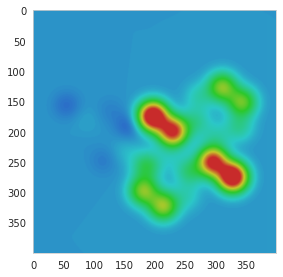

In [8]:
fnm = ldimg_is[25]
img = cv2.imread(dir_img+fnm)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(20,40))
ax = fig.add_subplot(1,4,1)
ax.imshow(img)

[  0  38 165]
total_target_total_target_10_5.txt.png
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(400, 400)
(400, 400)
(400, 400)


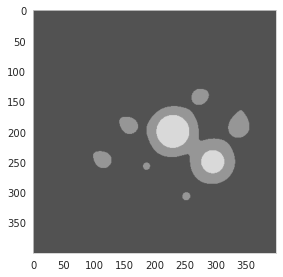

In [15]:
fnm = ldseg[25]

print(key)
print(fnm)
seg = cv2.imread(dir_seg+fnm)
seg_img = give_color_to_seg_img(seg)
fig = plt.figure(figsize=(20,40))
ax = fig.add_subplot(1,4,1)
ax.imshow(seg_img)
seg_img_0 = seg_img[:,:,0]


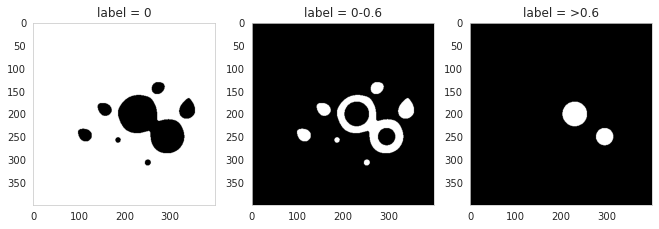

In [16]:
#propability = ["0","0.1-0.2","0.2-0.3","0.3-0.4","0.4-0.5","0.5-0.6",">0.6"]
propability = ["0","0-0.6",">0.6"]
fig = plt.figure(figsize=(15,10))
for i in range(len(marker_value)):
    number = i+1
    ax = fig.add_subplot(2,4,number)
    ax.imshow((seg == marker_value[i])*1.0)
    ax.set_title("label = {}".format(propability[i]))
plt.show()


In [17]:
import random
# divide seg pixel value to 3 class, 
def give_color_to_seg_img(seg):

    if len(seg.shape) ==3:
        seg = seg[:,:,0]
    seg_img = np.zeros( (seg.shape[0],seg.shape[1],3)).astype("float")
    #colors  = sns.color_palette("hls",3)
    colors = sns.color_palette("Greys_r",3)
    print(colors)#print the color sns choose for different GSH probability.

    print(len(colors))
    for c in range(3):
        
        segc = (seg == marker_value[c])
        print(segc.shape)
        seg_img[:,:,0] += (segc*(colors[c][0]))
        seg_img[:,:,1] += (segc*(colors[c][1]))
        seg_img[:,:,2] += (segc*(colors[c][2]))
    seg_other = (seg_img[:,:,0] ==0)#put other GSH probability value to class2

    return(seg_img)

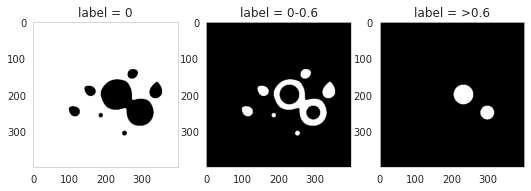

In [18]:
color = [0.3225836216839677,0.5906343713956171,0.8531026528258362]
fig = plt.figure(figsize=(15,10))
for i in range(3):
    number = i+1
    ax = fig.add_subplot(2,5,number)
    ax.imshow((seg_img == color[i])*1.0)
    ax.set_title("label = {}".format(propability[i]))
plt.show()

In [19]:
key = np.unique(seg_img)
result = {}
for k in key:
        mask = ( seg_img_0== k)
        seg_img_0_new = seg_img_0[mask]
        v = seg_img_0_new.size
        result[k] = v
color_label = [0.3225836216839677,0.5906343713956171,0.8531026528258362]
result
class_0_weight = 0.522
class_1_weight = 1
class_2_weight = 7.75


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


total_target_total_target_10_0.txt.png
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(400, 400)
(400, 400)
(400, 400)


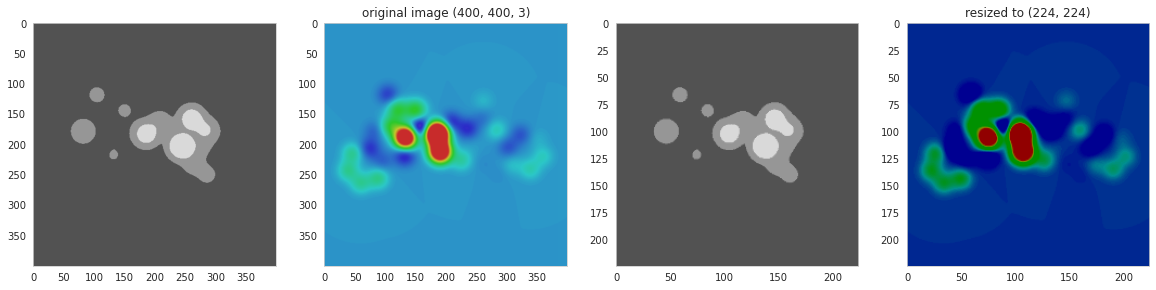

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


total_target_total_target_10_1.txt.png
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(400, 400)
(400, 400)
(400, 400)


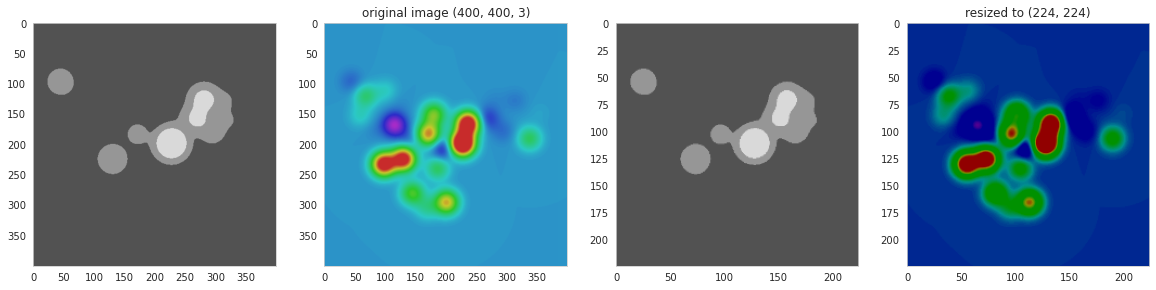

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


total_target_total_target_10_2.txt.png
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(400, 400)
(400, 400)
(400, 400)


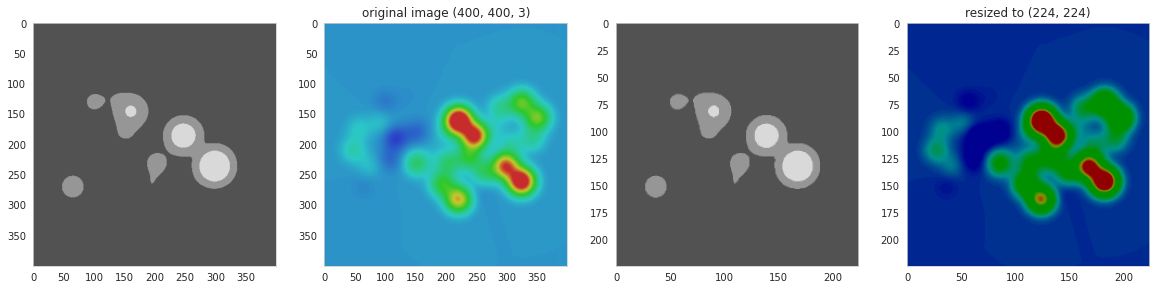

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


total_target_total_target_10_3.txt.png
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(400, 400)
(400, 400)
(400, 400)


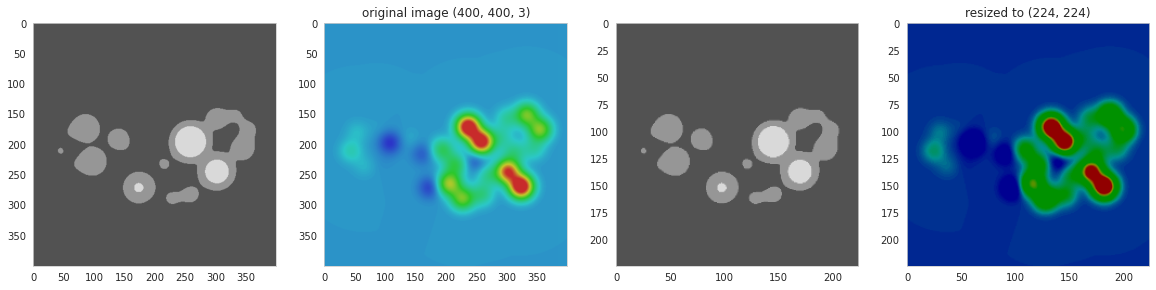

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


total_target_total_target_10_4.txt.png
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(400, 400)
(400, 400)
(400, 400)


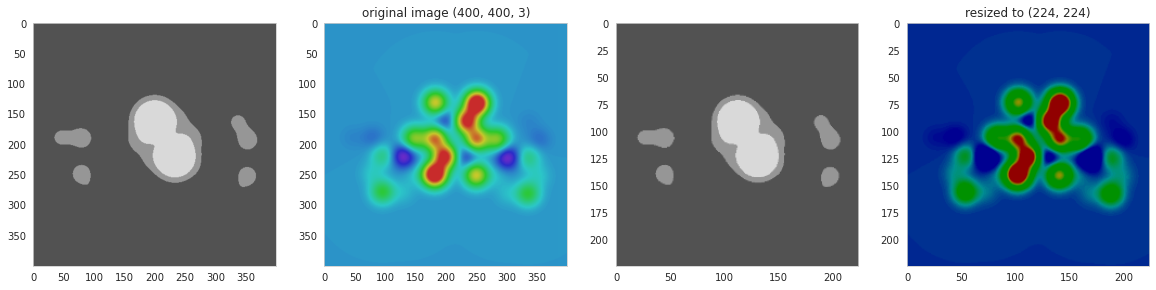

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


total_target_total_target_10_5.txt.png
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(400, 400)
(400, 400)
(400, 400)


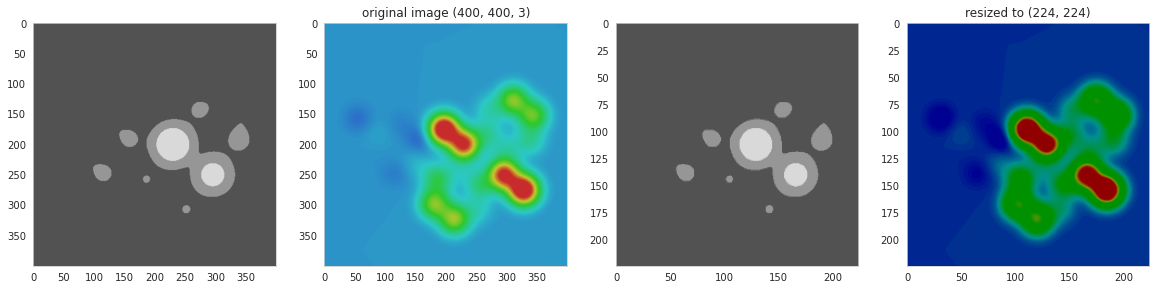

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


total_target_total_target_10_6.txt.png
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(400, 400)
(400, 400)
(400, 400)


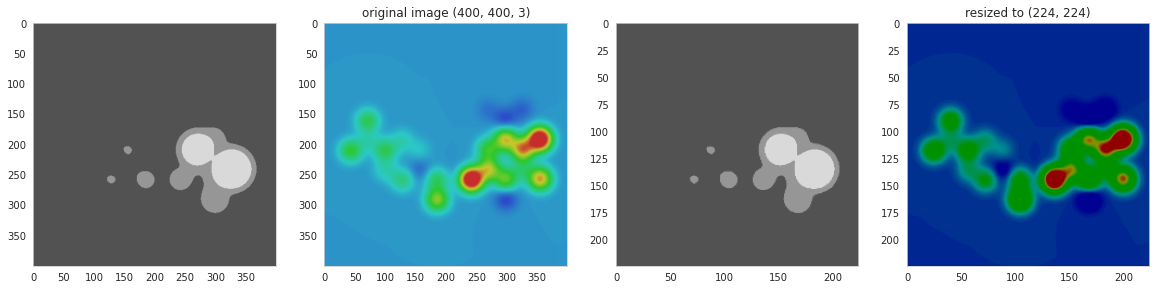

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


total_target_total_target_10_7.txt.png
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(400, 400)
(400, 400)
(400, 400)


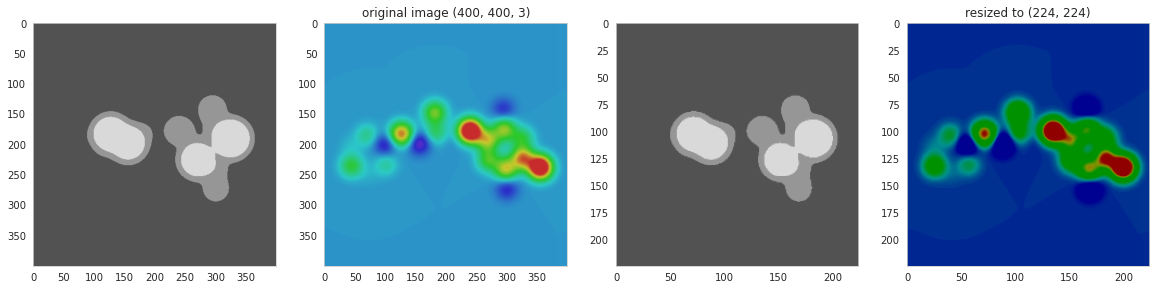

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


total_target_total_target_10_8.txt.png
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(400, 400)
(400, 400)
(400, 400)


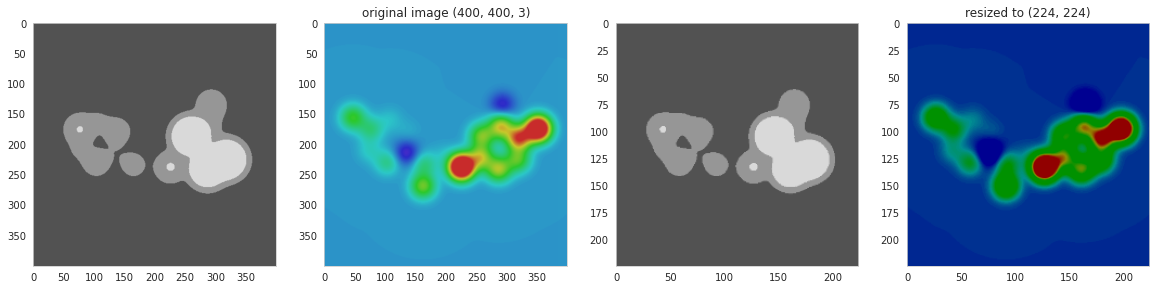

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


total_target_total_target_11_1.txt.png
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(400, 400)
(400, 400)
(400, 400)


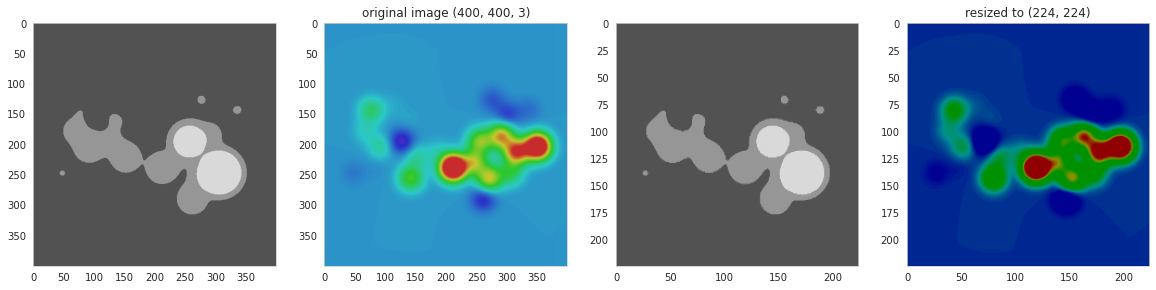

In [20]:
#change picture size to 224,224
input_height,input_width = 224,224
output_height,output_width  = 224,224
#for fnm in ldseg[np.random.choice(len(ldseg),20,replace = False)]:
for fnm in ldseg[20:30]:
    print(fnm)
    #fnm = fnm.split(".")[0]
    seg = cv2.imread(dir_seg+fnm)
    img_is = cv2.imread(dir_img + fnm)
    img_is = cv2.cvtColor(img_is,cv2.COLOR_BGR2RGB)
    Img = np.float32(cv2.resize(img_is, (input_width , input_height))) / 127.5 -1
    seg_img = give_color_to_seg_img(seg)
    fig = plt.figure(figsize=(20,40))
    ax = fig.add_subplot(1,4,1)
    ax.imshow(seg_img)
    
    ax = fig.add_subplot(1,4,2)
    ax.imshow(img_is)
    ax.set_title("original image {}".format(img_is.shape))
    ax = fig.add_subplot(1,4,3)
    ax.imshow(cv2.resize(seg_img,(input_height , input_width)))
    
    ax = fig.add_subplot(1,4,4)
    #ax.imshow(cv2.resize(img_is,(output_height , output_width))/255.0)
    ax.imshow(cv2.resize(Img,(output_height , output_width)))
    ax.set_title("resized to {}".format((output_height , output_width)))
    plt.show()    

In [21]:
n_classes =3
X_output = []
#use get ImageArr, change a pictcure to array

def getImageArr(path,width,height):
    img = cv2.imread(path,1)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #img_2 = np.float32(cv2.resize(img, (width , height)))
    
    #X_output.append(img_2)
    img = np.float32(cv2.resize(img, (width , height))) / 127.5 -1#让所有的像素点分布在-1到1之间
    #preprocessing, making each value in array between -1 and 1,called scallization.
    return img#这个过程叫图像标准化，均一化

#use getSegmentationArr,change label picture to a three layer 0-1 array,for each pixel, it has a hock label(0,0,1)

def getSegmentationArr( path , nClasses , width , height ):
    seg_labels = np.zeros(( height , width , 3 ))
    img = cv2.imread(path,1)
    img = cv2.resize(img, ( width , height ))
    img = give_color_to_seg_img(img)
    img = img[:,:,0]
    
    for c in range(3):
        seg_labels[:,:,c] = (img == color_label[c]).astype(int)# seg_label每一层存储的是一个真值表
        #0-1 binary for each layer
    return seg_labels
images = os.listdir(dir_img)
images.sort()
segmentations = os.listdir(dir_seg)
segmentations.sort()
X = []
Y = []
for im , seg in zip(images,segmentations):
    X.append(getImageArr(dir_img+im , input_width , input_height))
    Y.append(getSegmentationArr( dir_seg + seg , n_classes , output_width , output_height))
X,Y = np.array(X) , np.array(Y)
print(X.shape,Y.shape)

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.590634

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.590634

(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.590634

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.590634

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.590634

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.590634

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.590634

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.590634

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.590634

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.590634

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.590634

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.590634

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.590634

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.590634

(871, 224, 224, 3) (871, 224, 224, 3)


In [22]:
import tensorflow as tf
from tensorflow import keras
#tf.compat.v1.keras.backend.set_session()
import keras,sys,time,warnings
from keras.models import *
from keras.layers import *
import pandas as pd
from tensorflow.compat.v1.keras.backend import set_session
warnings.filterwarnings("ignore")
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

2022-02-14 20:09:25.159994: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [23]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2022-02-14 20:09:25.897302: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-14 20:09:25.898828: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-14 20:09:25.935356: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-14 20:09:25.935672: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 3000 computeCapability: 7.5
coreClock: 1.38GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s

In [24]:
warnings.filterwarnings("ignore")

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

config = tf.compat.v1.ConfigProto

gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.95)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

print("python {}".format(sys.version))
print("keras version {}".format(keras.__version__)); del keras
print("tensorflow version {}".format(tf.__version__))

python 3.8.11 (default, Aug  3 2021, 15:09:35) 
[GCC 7.5.0]
keras version 2.4.3
tensorflow version 2.4.1


2022-02-14 20:09:26.321705: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-14 20:09:26.322289: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 3000 computeCapability: 7.5
coreClock: 1.38GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2022-02-14 20:09:26.322406: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-14 20:09:26.322463: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-14 20:09:26.322529: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-02-14 20:09:26.322580: I tensorflow/stream_executor/platfor

In [25]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-02-14 20:09:26.330062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


True

2022-02-14 20:09:26.330523: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 3000 computeCapability: 7.5
coreClock: 1.38GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2022-02-14 20:09:26.330629: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-14 20:09:26.330664: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-14 20:09:26.330684: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-02-14 20:09:26.330702: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2022-02-14 20:09:26.330720: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcurand.so.

In [26]:
def FCN8( nClasses ,  input_height=224, input_width=224):
    ## input_height and width must be devisible by 32 because maxpooling with filter size = (2,2) is operated 5 times,
    ## which makes the input_height and width 2^5 = 32 times smaller
    assert input_height%32 == 0
    assert input_width%32 == 0
    IMAGE_ORDERING =  "channels_last" 

    img_input = Input(shape=(input_height,input_width, 3)) ## Assume 224,224,3
    
    ## Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', data_format=IMAGE_ORDERING )(img_input)
    #x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool', data_format=IMAGE_ORDERING )(x)
    f1 = x
    
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1', data_format=IMAGE_ORDERING )(x)
    #x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool', data_format=IMAGE_ORDERING )(x)
    f2 = x

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2', data_format=IMAGE_ORDERING )(x)
    #x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool', data_format=IMAGE_ORDERING )(x)
    pool3 = x

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2', data_format=IMAGE_ORDERING )(x)
    #x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3', data_format=IMAGE_ORDERING )(x)
    pool4 = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool', data_format=IMAGE_ORDERING )(x)## (None, 14, 14, 512) 

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1', data_format=IMAGE_ORDERING )(pool4)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2', data_format=IMAGE_ORDERING )(x)
    #x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3', data_format=IMAGE_ORDERING )(x)
    pool5 = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool', data_format=IMAGE_ORDERING )(x)## (None, 7, 7, 512)

    #x = Flatten(name='flatten')(x)
    #x = Dense(4096, activation='relu', name='fc1')(x)
    # <--> o = ( Conv2D( 4096 , ( 7 , 7 ) , activation='relu' , padding='same', data_format=IMAGE_ORDERING))(o)
    # assuming that the input_height = input_width = 224 as in VGG data
    
    #x = Dense(4096, activation='relu', name='fc2')(x)
    # <--> o = ( Conv2D( 4096 , ( 1 , 1 ) , activation='relu' , padding='same', data_format=IMAGE_ORDERING))(o)   
    # assuming that the input_height = input_width = 224 as in VGG data
    
    #x = Dense(1000 , activation='softmax', name='predictions')(x)
    # <--> o = ( Conv2D( nClasses ,  ( 1 , 1 ) ,kernel_initializer='he_normal' , data_format=IMAGE_ORDERING))(o)
    # assuming that the input_height = input_width = 224 as in VGG data
    
    
    vgg  = Model(  img_input , pool5  )
    #vgg.load_weights(VGG_Weights_path) ## loading VGG weights for the encoder parts of FCN8
    
    n = 4096
    o = ( Conv2D( n , ( 7 , 7 ) , activation='relu' , padding='same', name="conv6", data_format=IMAGE_ORDERING))(pool5)
    conv7 = ( Conv2D( n , ( 1 , 1 ) , activation='relu' , padding='same', name="conv7", data_format=IMAGE_ORDERING))(o)
    
    
    ## 4 times upsamping for pool4 layer
    conv7_4 = Conv2DTranspose( nClasses , kernel_size=(4,4) ,  strides=(4,4) , use_bias=False, data_format=IMAGE_ORDERING )(conv7)
    ## (None, 224, 224, 10)
    ## 2 times upsampling for pool411
    pool411 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool4_11", data_format=IMAGE_ORDERING))(pool4)
    pool411_2 = (Conv2DTranspose( nClasses , kernel_size=(2,2) ,  strides=(2,2) , use_bias=False, data_format=IMAGE_ORDERING ))(pool411)
    
    pool311 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool3_11", data_format=IMAGE_ORDERING))(pool3)
        
    o = Add(name="add")([pool411_2, pool311, conv7_4 ])
    o = Conv2DTranspose( nClasses , kernel_size=(8,8) ,  strides=(8,8) , use_bias=False, data_format=IMAGE_ORDERING )(o)
    o = (Activation('softmax'))(o)
    
    model = Model(img_input, o)

    return model

model = FCN8(nClasses     = 3,  
             input_height = 224, 
             input_width  = 224)
model.summary()

2022-02-14 20:09:26.355128: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-14 20:09:26.355330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-14 20:09:26.355615: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 3000 computeCapability: 7.5
coreClock: 1.38GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2022-02-14 20:09:26.355681: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-14 20:09:26.355704: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-14 20:09:26.355721: I tensorflow/stream_executor/platform/default/

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv1[0][0]               
__________________________________________________________________________________________________
block2_conv1 (Conv2D)           (None, 112, 112, 128 73856       block1_pool[0][0]                
____________________________________________________________________________________________

In [27]:
from sklearn.utils import shuffle
train_rate = 0.85
np.random.seed(300)

index_train = np.random.choice(X.shape[0],int(X.shape[0]*train_rate),replace=False)
index_test  = list(set(range(X.shape[0])) - set(index_train))
                            
#X, Y = shuffle(X,Y)
X_train, y_train = X[index_train],Y[index_train]
X_test, y_test = X[index_test],Y[index_test]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(740, 224, 224, 3) (740, 224, 224, 3)
(131, 224, 224, 3) (131, 224, 224, 3)


In [28]:
print(index_test)

[514, 9, 525, 536, 32, 548, 37, 553, 42, 44, 53, 567, 569, 572, 576, 577, 585, 586, 79, 592, 594, 88, 600, 91, 92, 604, 94, 95, 99, 611, 101, 103, 105, 618, 619, 108, 111, 627, 117, 630, 120, 633, 640, 129, 131, 139, 657, 147, 153, 668, 680, 174, 175, 687, 177, 178, 688, 691, 185, 186, 698, 701, 713, 714, 720, 209, 212, 724, 725, 218, 222, 223, 738, 227, 739, 740, 747, 238, 245, 246, 253, 260, 773, 264, 778, 784, 277, 792, 795, 284, 288, 289, 802, 294, 296, 814, 815, 816, 308, 823, 829, 320, 322, 327, 332, 338, 341, 342, 861, 354, 361, 370, 371, 374, 387, 389, 406, 407, 427, 439, 441, 443, 452, 459, 460, 461, 468, 472, 481, 493, 505]


In [29]:
for i in range(len(index_test)):
    number = index_test[i]
    print(ldseg[number])

total_target_total_target_65_2.txt.png
total_target_total_target_100_9.txt.png
total_target_total_target_66_3.txt.png
total_target_total_target_67_4.txt.png
total_target_total_target_11_4.txt.png
total_target_total_target_68_6.txt.png
total_target_total_target_12_0.txt.png
total_target_total_target_69_1.txt.png
total_target_total_target_12_5.txt.png
total_target_total_target_12_7.txt.png
total_target_total_target_13_7.txt.png
total_target_total_target_6_7.txt.png
total_target_total_target_70_0.txt.png
total_target_total_target_70_3.txt.png
total_target_total_target_70_7.txt.png
total_target_total_target_70_8.txt.png
total_target_total_target_71_7.txt.png
total_target_total_target_71_8.txt.png
total_target_total_target_16_3.txt.png
total_target_total_target_72_4.txt.png
total_target_total_target_72_7.txt.png
total_target_total_target_17_3.txt.png
total_target_total_target_73_3.txt.png
total_target_total_target_17_6.txt.png
total_target_total_target_17_7.txt.png
total_target_total_target

In [30]:
import tensorflow.keras.backend as K
from tensorflow.keras.losses import categorical_crossentropy
 
from keras import optimizers
#

In [31]:
weights = np.array([class_0_weight,1,class_2_weight])
buny = np.array([class_2_weight,1,class_0_weight])#change weight in order to find the best prediction result
def dice_coef_value(weights,buny):
    weights = K.variable(weights)
    buny = K.variable(buny)
    def loss(y_true, y_pred):
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)#same as softmax
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())#scalization,ensure the value between 0-1
        loss = y_true * K.log(y_pred) * weights
        loss = -K.sum(loss, -1)
        return loss
    return loss

In [32]:
def precision(y_true, y_pred):
    #weights = K.variable(weights)
    y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    precision  = y_true * y_pred * buny
    precision = K.sum(precision, -1)
    return precision

In [33]:
sgd = optimizers.SGD(lr=1E-1, decay=5**(-4), momentum=0.9, nesterov=True)
model.compile(loss=dice_coef_value(weights,buny),
              optimizer=sgd,
              metrics=[precision])


hist1 = model.fit(X_train,y_train,
                  validation_data=(X_test,y_test),
                  batch_size=32,epochs=50,verbose=2)

2022-02-14 20:09:28.561714: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-14 20:09:28.582113: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/50


2022-02-14 20:09:29.210752: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-02-14 20:09:30.118332: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-14 20:09:30.660432: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.34GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-02-14 20:09:30.906475: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-02-14 20:09:31.553877: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) r

24/24 - 24s - loss: 0.8195 - precision: 2.3459 - val_loss: 0.8182 - val_precision: 2.4056
Epoch 2/50
24/24 - 17s - loss: 0.7004 - precision: 3.8618 - val_loss: 0.6271 - val_precision: 4.6297
Epoch 3/50
24/24 - 18s - loss: 0.5815 - precision: 5.0107 - val_loss: 0.5998 - val_precision: 3.9502
Epoch 4/50
24/24 - 18s - loss: 0.5579 - precision: 5.1083 - val_loss: 0.5757 - val_precision: 6.0465
Epoch 5/50
24/24 - 18s - loss: 0.4687 - precision: 5.4787 - val_loss: 0.5458 - val_precision: 3.9847
Epoch 6/50
24/24 - 18s - loss: 0.4808 - precision: 5.3604 - val_loss: 0.4101 - val_precision: 5.7464
Epoch 7/50
24/24 - 18s - loss: 0.4372 - precision: 5.6100 - val_loss: 0.3931 - val_precision: 5.7324
Epoch 8/50
24/24 - 18s - loss: 0.3894 - precision: 5.8358 - val_loss: 0.3720 - val_precision: 6.0270
Epoch 9/50
24/24 - 18s - loss: 0.3364 - precision: 6.0541 - val_loss: 0.3400 - val_precision: 6.1573
Epoch 10/50
24/24 - 18s - loss: 0.3260 - precision: 6.0996 - val_loss: 0.3346 - val_precision: 6.1076


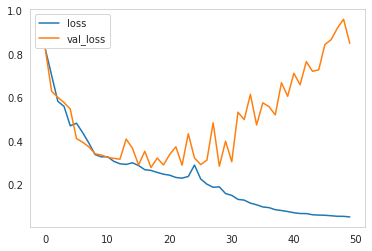

In [35]:
for key in ['loss', 'val_loss']:
    plt.plot(hist1.history[key],label=key)
plt.legend()
plt.show()

In [36]:
y_pred = model.predict(X_train,batch_size=2)
#argmax,the largest value for each pixel
y_predi = np.argmax(y_pred, axis=3)
y_testi = np.argmax(y_train, axis=3)
print(y_testi.shape,y_predi.shape)

(740, 224, 224) (740, 224, 224)


In [37]:
def IoU(Yi,y_predi):#use IoU to evaluate prediction result
    ## mean Intersection over Union
    ## Mean IoU = TP/(FN + TP + FP)
    

    IoUs = []
    Nclass = int(np.max(Yi)) + 1
    #class 0, class1, class2 is defined as above
    for c in range(3):
        #class_ = np.sum(Yi ==c)
        
        TP = np.sum( (Yi == c)&(y_predi==c) )
        FP = np.sum( (Yi != c)&(y_predi==c) )
        FN = np.sum( (Yi == c)&(y_predi != c)) 
        IoU = TP/float(TP + FP + FN)
        print("class {:02.0f}: #TP={:6.0f}, #FP={:6.0f}, #FN={:5.0f}, IoU={:4.3f}".format(c,TP,FP,FN,IoU))
        #print("class {:02.0f}: #TP={:6.0f}".format(c,class_0))
        IoUs.append(IoU)
    mIoU = np.mean(IoUs)
    print("_________________")
    print("Mean IoU: {:4.3f}".format(mIoU))
    
IoU(y_testi,y_predi)

class 00: #TP=32587597, #FP=110272, #FN=858063, IoU=0.971
class 01: #TP=2298406, #FP=769911, #FN=374856, IoU=0.668
class 02: #TP=1004414, #FP=359640, #FN= 6904, IoU=0.733
_________________
Mean IoU: 0.790


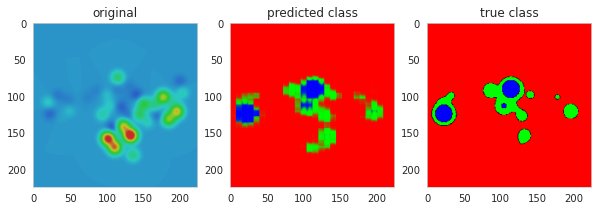

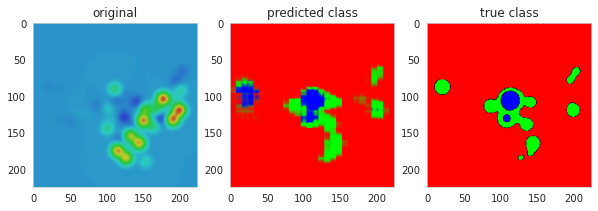

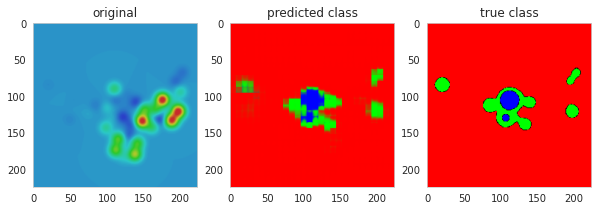

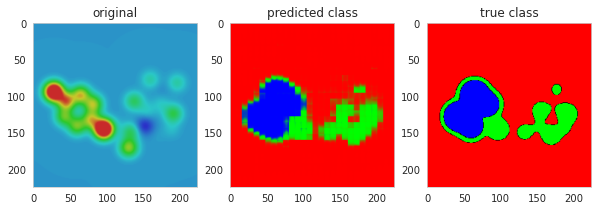

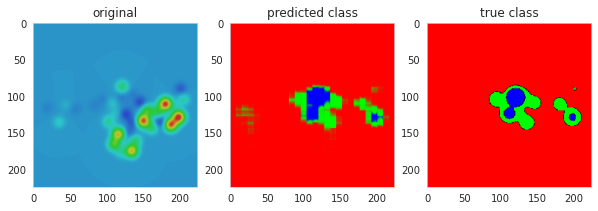

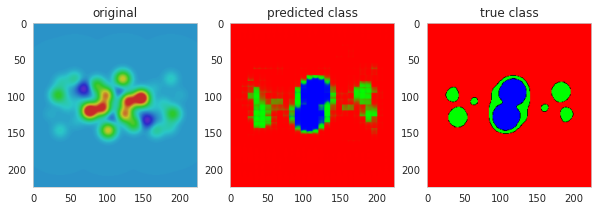

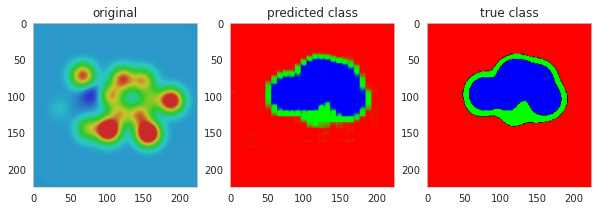

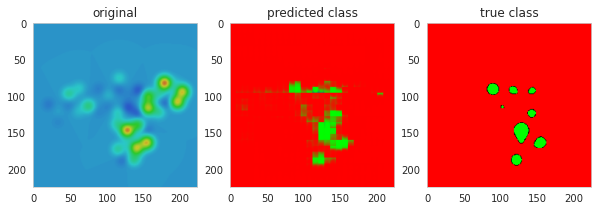

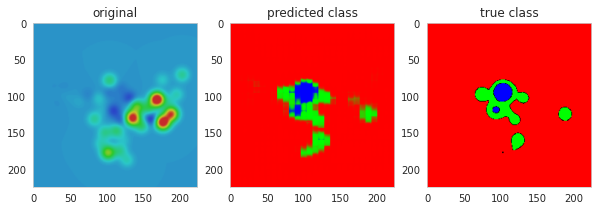

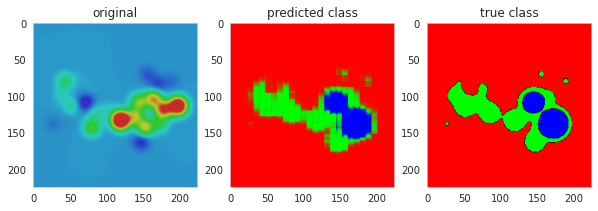

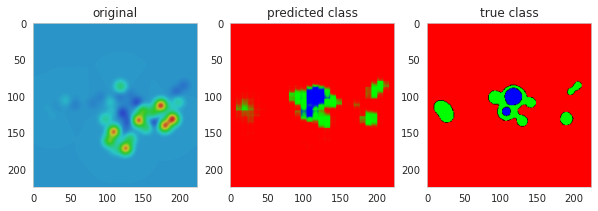

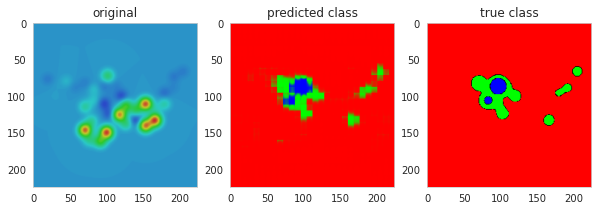

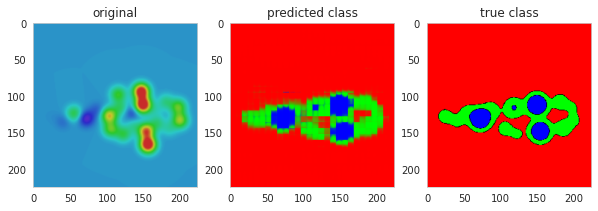

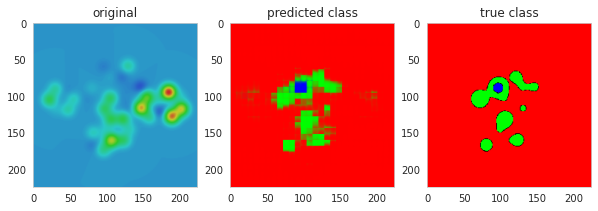

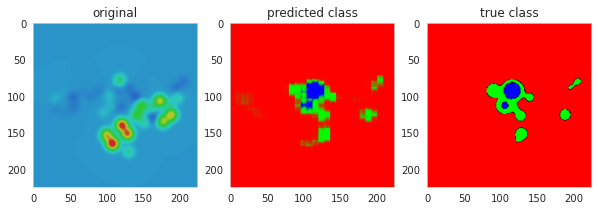

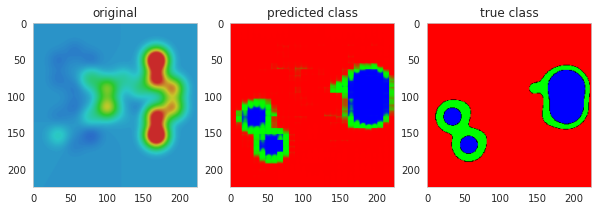

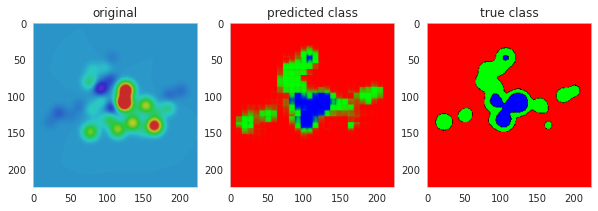

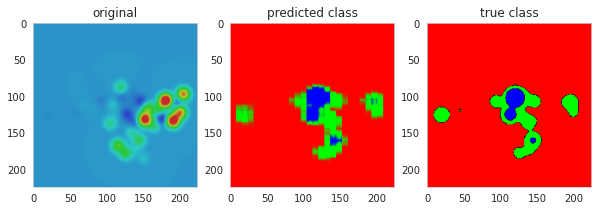

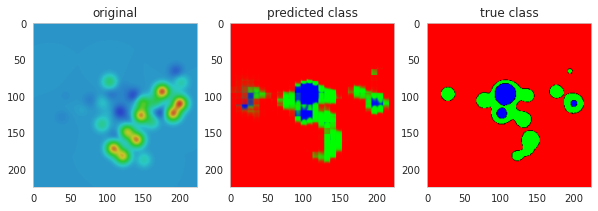

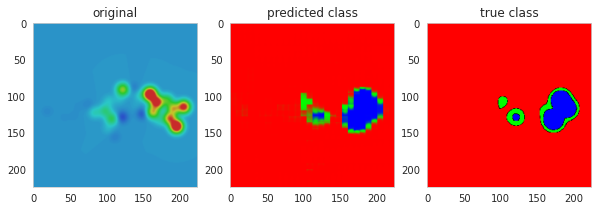

In [38]:
shape = (224,224)
n_classes= 3

for i in range(20):
    img_is  = (X_train[i] + 1)*(255.0/2)/255
    #img_is  = X_train[i]
    seg = y_pred[i]
    #print(seg.shape)
    #seg = PIL.Image.fromarray(seg)
    #seg.convert('L')
    #seg_i = seg*2/255-1
    #seg = seg*255
    segtest = y_train[i]

    fig = plt.figure(figsize=(10,30))    
    ax = fig.add_subplot(1,3,1)
    #ax.imshow(img_is/255.0)
    ax.imshow(img_is)
    ax.set_title("original")
    
    ax = fig.add_subplot(1,3,2)
    ax.imshow(seg)
    ax.set_title("predicted class")
    
    ax = fig.add_subplot(1,3,3)
    ax.imshow(segtest)
    ax.set_title("true class")
    plt.show()

In [39]:
y_pred = model.predict(X_test,batch_size=2)
#argmax,the largest value for each pixel
y_predi = np.argmax(y_pred, axis=3)
y_testi = np.argmax(y_test, axis=3)
print(y_testi.shape,y_predi.shape)

(131, 224, 224) (131, 224, 224)


In [40]:
IoU(y_testi,y_predi)

class 00: #TP=5586310, #FP=142512, #FN=311169, IoU=0.925
class 01: #TP=316147, #FP=324893, #FN=174665, IoU=0.388
class 02: #TP=101299, #FP=101895, #FN=83466, IoU=0.353
_________________
Mean IoU: 0.555


[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


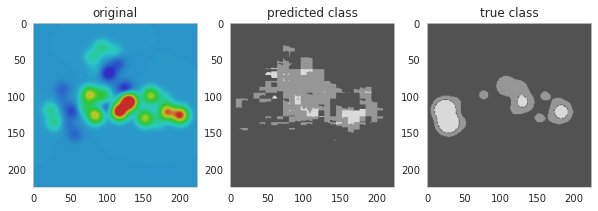

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


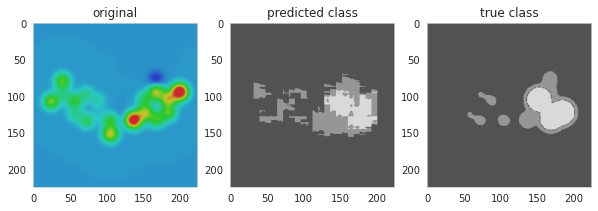

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


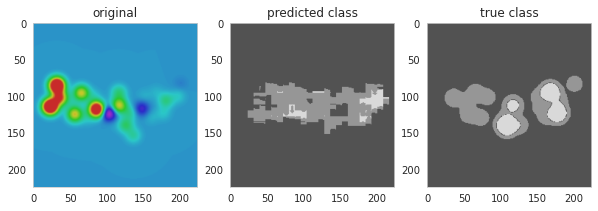

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


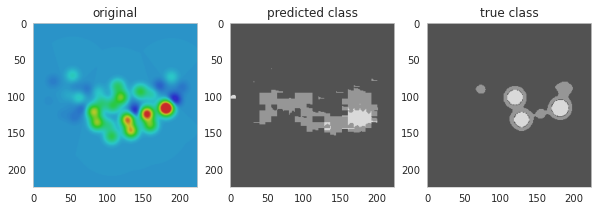

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


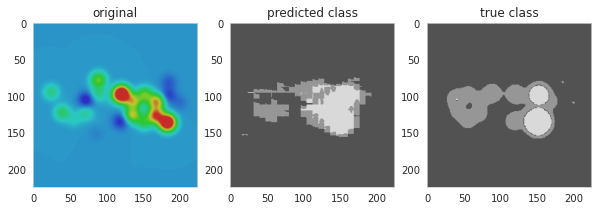

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


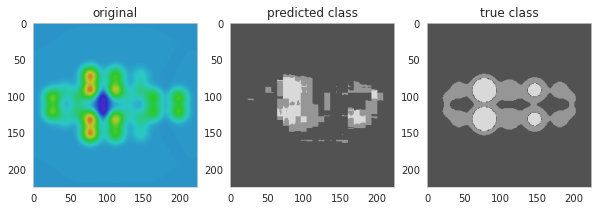

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


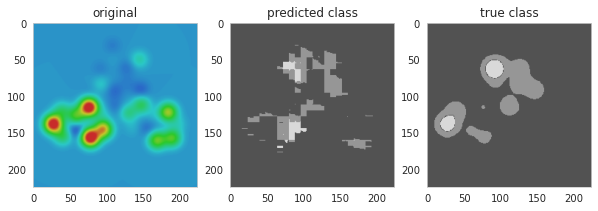

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


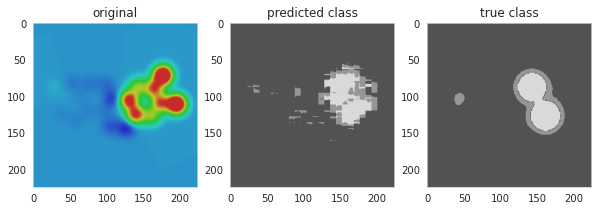

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


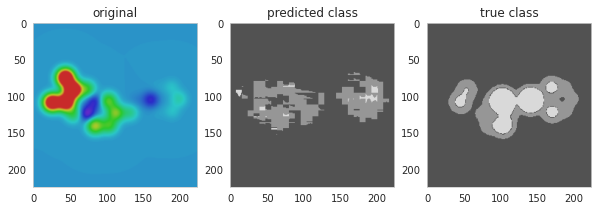

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


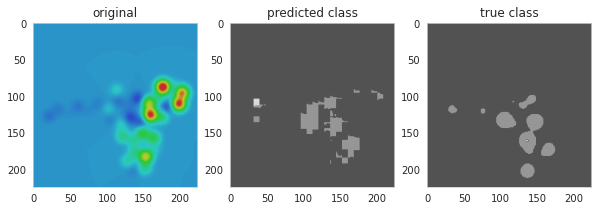

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


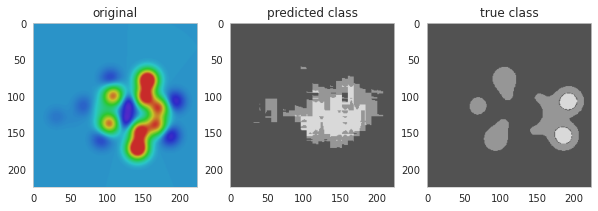

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


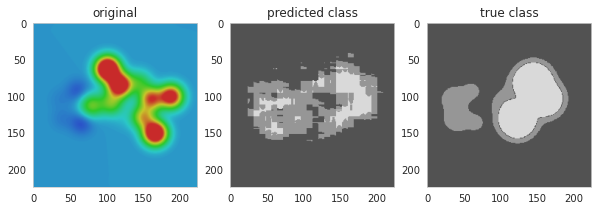

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


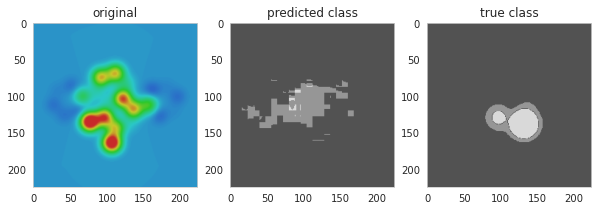

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


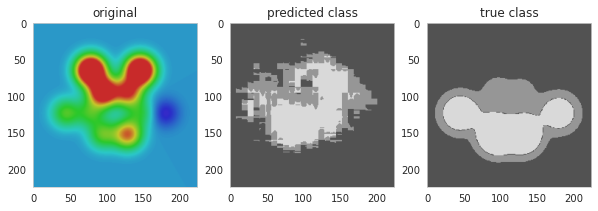

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


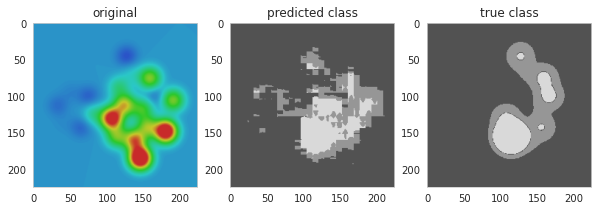

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


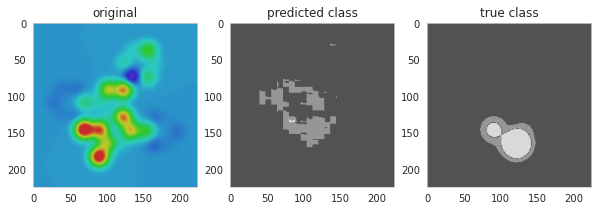

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)


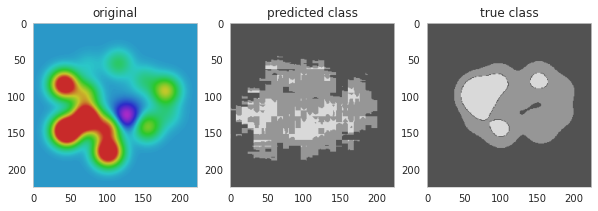

In [41]:
shape = (224,224)
n_classes= 3

for i in range(17):
    #img_is  = (X_test[i] + 1)*(255.0/2)
    img_is  = (X_test[i] + 1)*(255.0/2)/255
    seg = y_predi[i]
    #print(seg.shape)
    #seg = PIL.Image.fromarray(seg)
    #seg.convert('L')
    #seg_i = seg*2/255-1
    #seg = seg*255
    segtest = y_testi[i]

    fig = plt.figure(figsize=(10,30))    
    ax = fig.add_subplot(1,3,1)
    #ax.imshow(img_is/255.0)
    ax.imshow(img_is)
    ax.set_title("original")
    
    ax = fig.add_subplot(1,3,2)
    ax.imshow(give_color_to_seg_img_result(seg))
    ax.set_title("predicted class")
    
    ax = fig.add_subplot(1,3,3)
    ax.imshow(give_color_to_seg_img_result(segtest))
    ax.set_title("true class")
    plt.show()

[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.5906343713956171), (0.8531026528258362, 0.8531026528258362, 0.8531026528258362)]
3
(224, 224)
(224, 224)
(224, 224)
[(0.3225836216839677, 0.3225836216839677, 0.3225836216839677), (0.5906343713956171, 0.5906343713956171, 0.590634

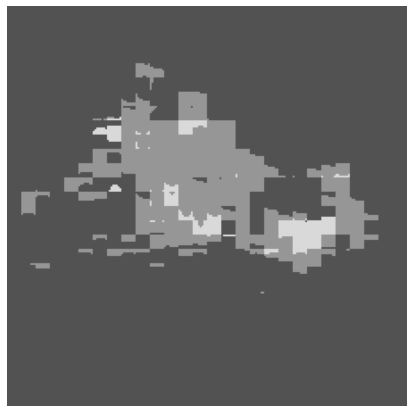

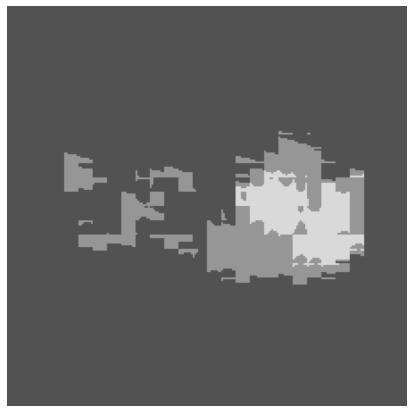

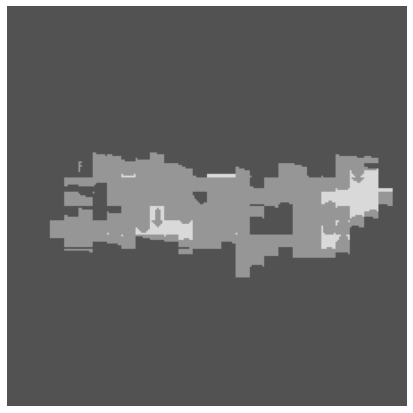

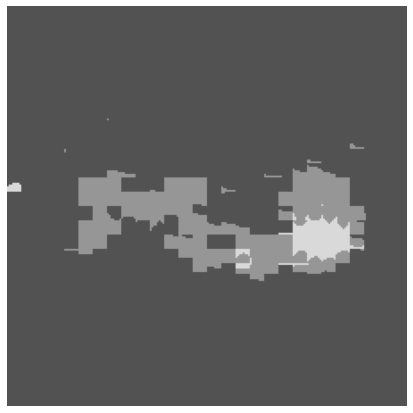

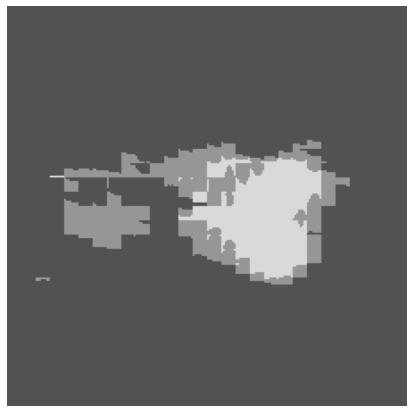

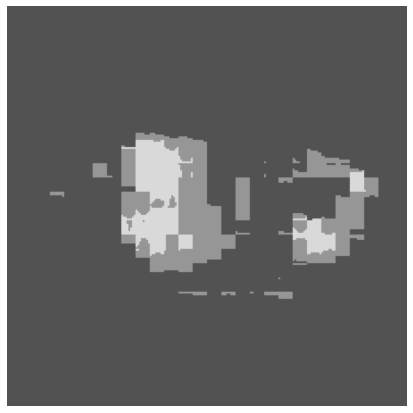

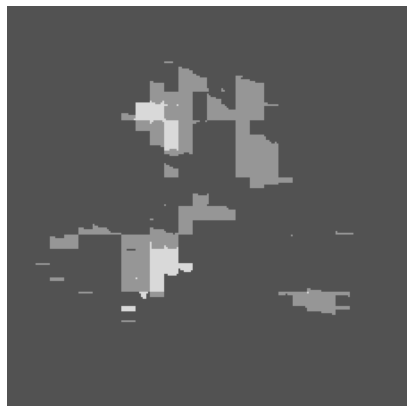

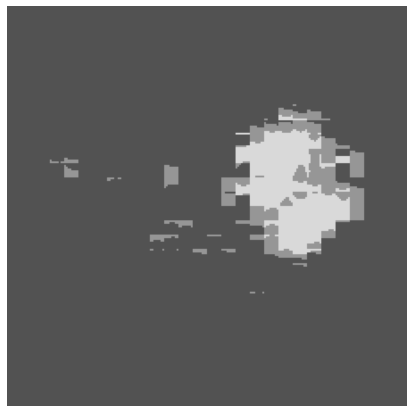

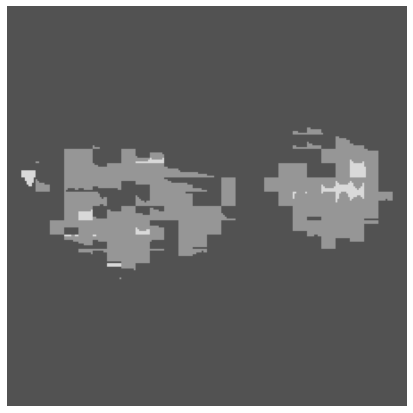

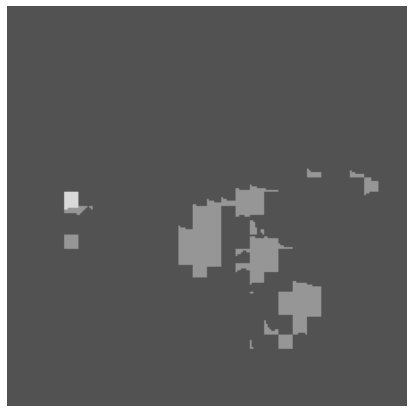

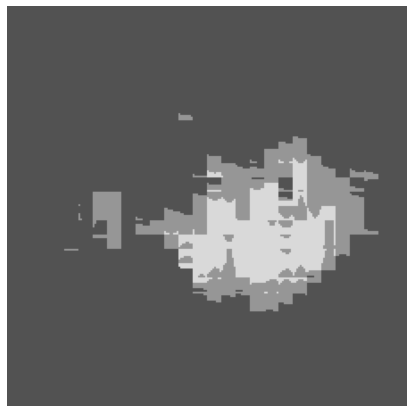

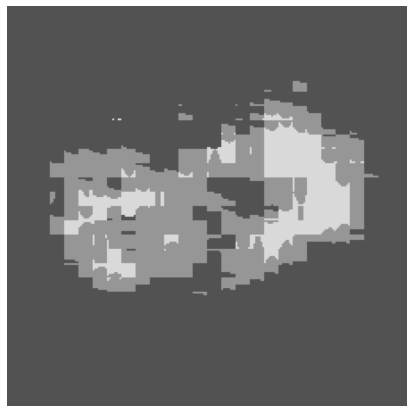

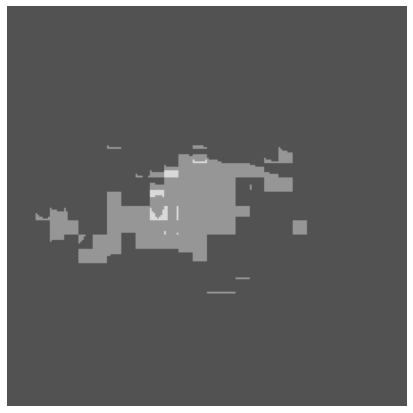

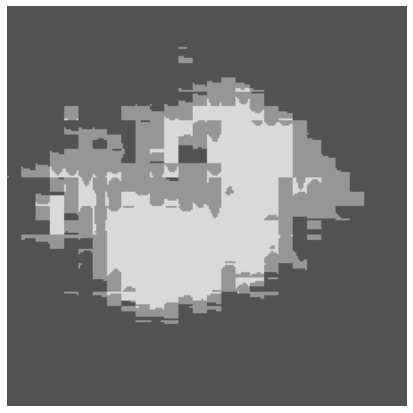

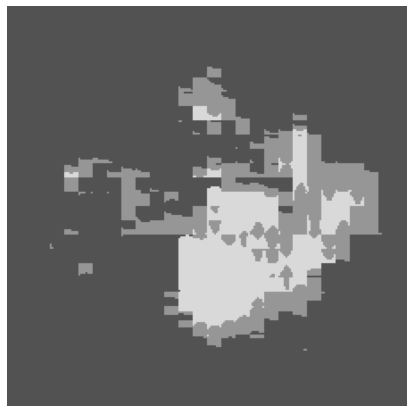

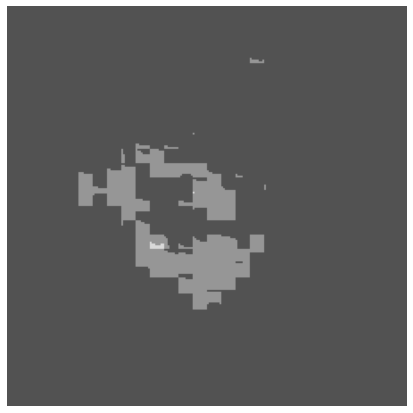

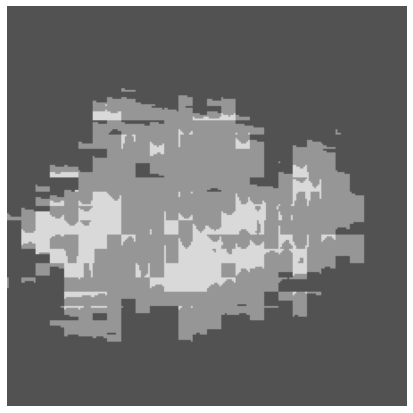

In [42]:
for i in range(17):
    number = index_test[i]
    file_name = ldseg[number]
    #seg = y_predi[i]
    seg = y_predi[i]
    
    plt.figure(figsize=(7.35,7.35))
    fig = plt.imshow(give_color_to_seg_img_result(seg))
    plt.axis('off')
    #plt.savefig('image.png', bbox_inches='tight',pad_inches = 0)
    plt.savefig('/home/user/yang/sorce_code/example_data/experiment_data/prediction_graph/%s.png'%(file_name),bbox_inches='tight',pad_inches = 0)




In [34]:
marker_value_result = [0,1,2]
def give_color_to_seg_img_result(seg):

    if len(seg.shape) ==3:
        seg = seg[:,:,0]
    seg_img = np.zeros( (seg.shape[0],seg.shape[1],3)).astype("float")
    #colors  = sns.color_palette("hls",3)
    colors = sns.color_palette("Greys_r",3)
    print(colors)#print the color sns choose for different GSH probability.

    print(len(colors))
    for c in range(3):
        
        segc = (seg == marker_value_result[c])
        print(segc.shape)
        seg_img[:,:,0] += (segc*(colors[c][0]))
        seg_img[:,:,1] += (segc*(colors[c][1]))
        seg_img[:,:,2] += (segc*(colors[c][2]))
    seg_other = (seg_img[:,:,0] ==0)#put other GSH probability value to class2

    return(seg_img)